# Final Project Submission
Student name: Boniface Ngechu

Student pace: full time

Instructor name:MaryAnn Mwikali



## Introduction
In this project, my goal is to develop a classification model that predicts customer churn for SyriaTel, a telecommunications company. Customer churn, which refers to the loss of clients to competitors or other reasons, is a major challenge for businesses in the telecom sector. By identifying customers who are likely to leave, SyriaTel can create targeted retention strategies to minimize churn and enhance customer loyalty.


# Business Understanding

## Overview
The telecommunications sector is intensely competitive, with companies continuously working to retain their current customers while attracting new ones. Customer churn, where individuals cease using a company’s services, presents a significant challenge. Addressing churn is vital because retaining existing customers is generally more cost-effective than acquiring new ones.

## Problem statement
SyriaTel, a prominent telecommunications provider, is grappling with challenges in retaining its customers. The company has noted a rise in churn rates due to declining customer loyalty. To address this issue, it aims to identify customers at risk of leaving and implement strategies to retain them proactively.

## Key stakeholders
Business Analysts: Analyzing churn patterns and assessing their impact on company revenue to provide actionable insights.
Executive Team: Prioritizing overall business performance by devising strategies to improve customer retention and sustain growth.
Business Analysts: Focused on understanding churn patterns and their impact on the company’s revenue.

## Project goal

The main goal of this project is to develop a machine learning model capable of effectively predicting whether a SyriaTel customer is likely to churn. By uncovering the factors driving customer churn, the company can deploy tailored retention initiatives to reduce churn rates and enhance overall customer satisfaction.

# Data understanding

In this section, I will examine the dataset provided by SyriaTel. Gaining insight into the data's structure and attributes is essential before proceeding with the analysis. I will assess the data types, identify any missing values, and analyze the distribution of the features.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')



In [2]:
#loading the dataset into the pandas dataframe.
data=pd.read_csv('data.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
#printing the first five rows of the dataset
data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#printing the last five rows of the dataset
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
#printing randomly five sample rows of the dataset
data.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3009,VA,133,408,385-1464,no,yes,39,239.9,107,40.78,...,77,21.57,128.7,85,5.79,6.7,3,1.81,5,False
696,AR,156,415,388-6223,no,no,0,178.8,94,30.40,...,97,15.16,169.2,77,7.61,7.5,3,2.03,1,False
3149,SC,41,510,353-2391,no,no,0,207.2,138,35.22,...,83,18.20,193.0,105,8.69,11.9,4,3.21,1,False
506,OH,136,415,407-2248,no,yes,31,143.1,88,24.33,...,65,20.11,227.8,120,10.25,11.4,5,3.08,2,False
2946,OR,82,415,400-3147,no,yes,19,146.5,73,24.91,...,65,20.94,199.0,114,8.96,4.1,4,1.11,1,False


In [6]:
#printing the columns of the dataset
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
#printing the information about then dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
#checking the data types in our dataset
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [9]:
#get the summary statistics of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
#checking the missing value in our dataset
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
#checking the duplicates in our dataset
data.duplicated().sum()

0

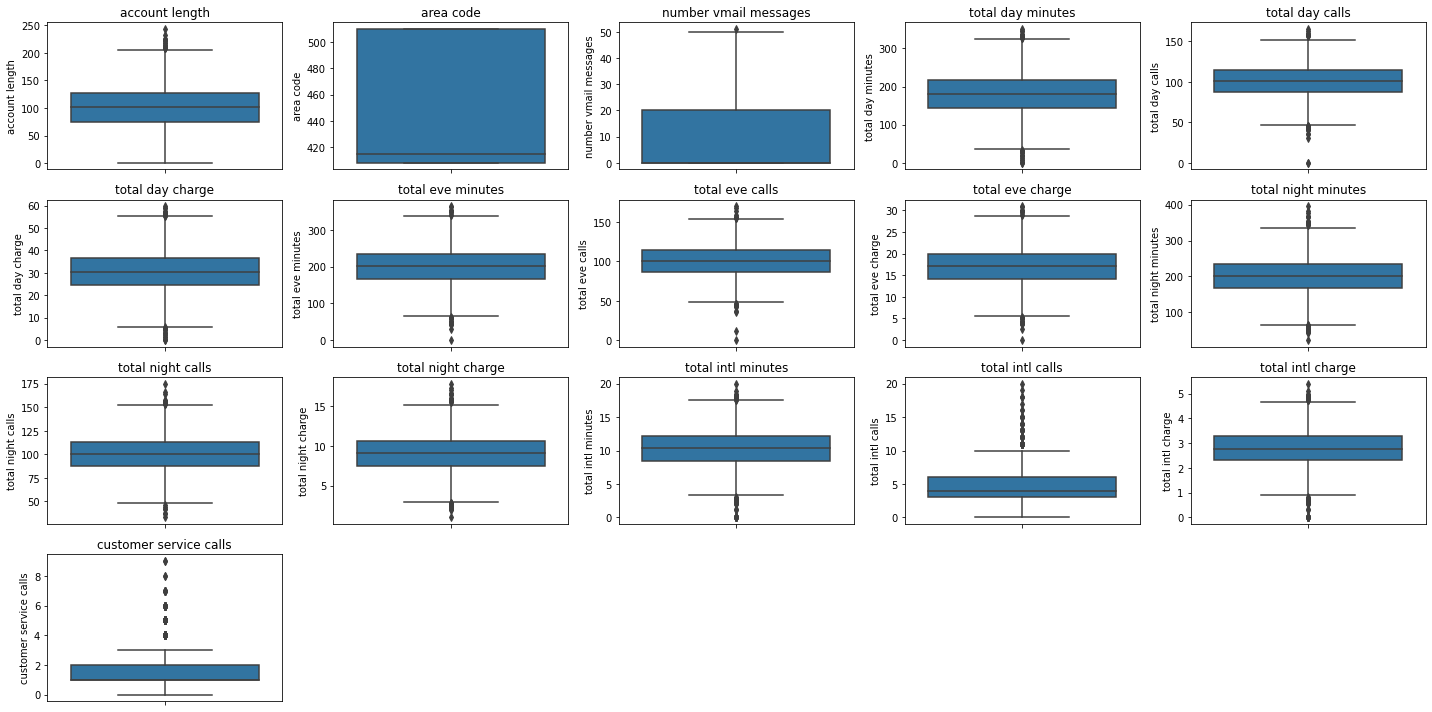

In [12]:
# Create a DataFrame with only numerical columns
numerical_colm = data.select_dtypes(exclude='object').columns

# Exclude 'churn' if it exists
if 'churn' in numerical_colm:
    numerical_colm = numerical_colm.drop('churn')

# Plot boxplots for numerical columns
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_colm):
    plt.subplot(4, 5, i + 1)  # Adjust grid size based on column count
    sns.boxplot(data=data, y=col)  
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
#removing outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the bounds
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply removal for each numerical column
for col in numerical_colm:
    data = remove_outliers(data, col)

print("Outliers have been removed.")

Outliers have been removed.


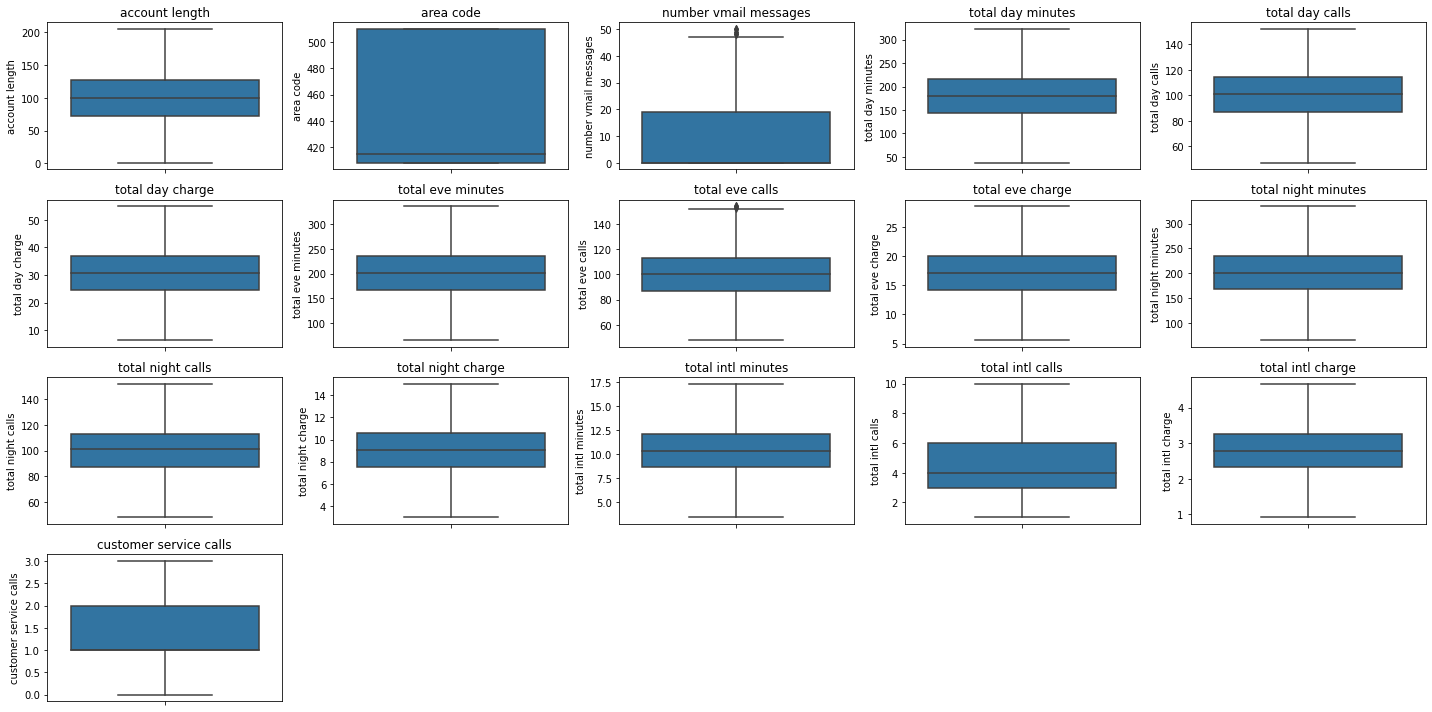

In [14]:
# Boxplot to confirm outlier handling
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_colm):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

False    2493
True      304
Name: churn, dtype: int64


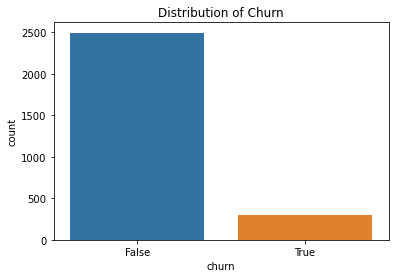

In [15]:
# Check target variable distribution
print(data['churn'].value_counts())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='churn')
plt.title("Distribution of Churn")
plt.show()

#### Data preparation

In [16]:
# Drop 'phone number' column as it is not relevant to our analysis and modelling
data = data.drop(columns=["phone number"], axis=1)
data.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [17]:
# Replace spaces with underscores in column names
data.rename(columns=lambda x: x.replace(' ', '_'),inplace=True)
data.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


#### Feature Engineering

In [18]:
# Creating a new feature 'total_calls'
data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls'] + data['total_intl_calls']

# Creating a new feature 'total_minutes'
data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
data.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_minutes
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.7,1,False,303,707.2
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.7,1,False,332,611.5


In [19]:
# Calculate correlation with the target variable
correlations = data.corr()['churn'].sort_values(ascending=False)
print(correlations)

churn                     1.000000
total_day_minutes         0.296650
total_day_charge          0.296645
total_minutes             0.290852
total_eve_minutes         0.139158
total_eve_charge          0.139144
total_intl_charge         0.076327
total_intl_minutes        0.076292
total_night_minutes       0.057638
total_night_charge        0.057623
total_day_calls           0.023329
total_night_calls         0.018733
total_calls               0.018286
account_length            0.012934
total_eve_calls          -0.003776
area_code                -0.004978
customer_service_calls   -0.016661
total_intl_calls         -0.058596
number_vmail_messages    -0.086322
Name: churn, dtype: float64


# Exploratory data analysis

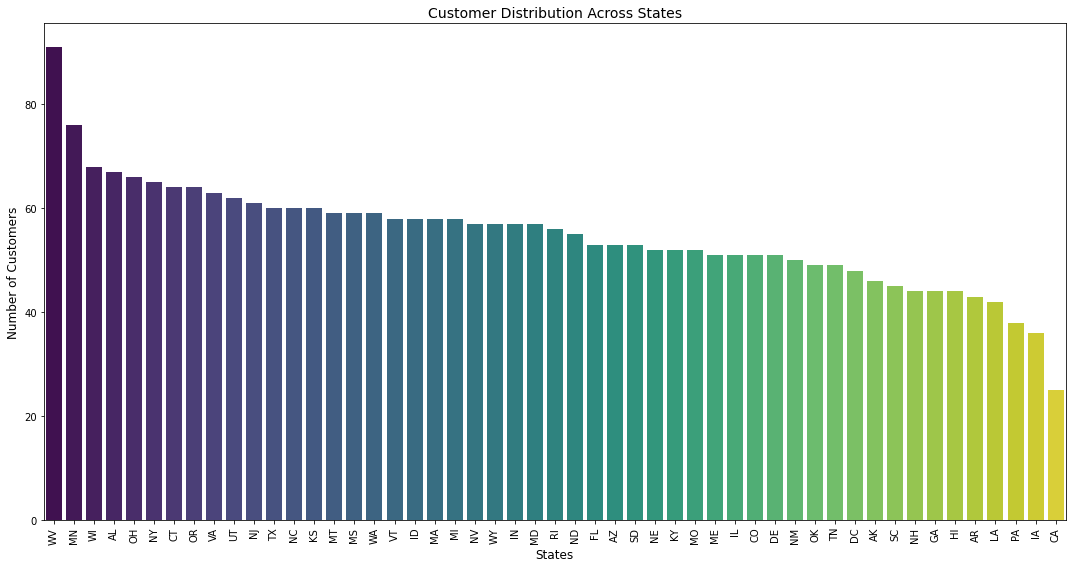

In [20]:

# Plot customer distribution across states
plt.figure(figsize=(15, 8)) 
sns.countplot(data=data, x='state', order=data['state'].value_counts().index, palette='viridis')

# Set the title and labels
plt.title('Customer Distribution Across States', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

####
majority of the customers live in west virginia and minesota state


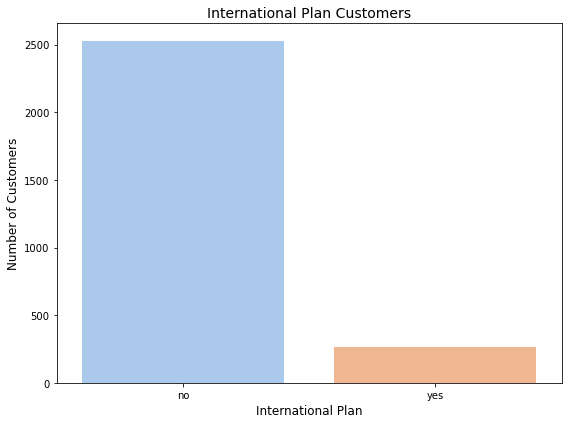

In [21]:
# Plot the distribution of customers with/without an international plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='international_plan', palette='pastel')

# Set the title and axis labels
plt.title('International Plan Customers', fontsize=14)
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### majority of the customers do not have internation plan  as  compared to those who have

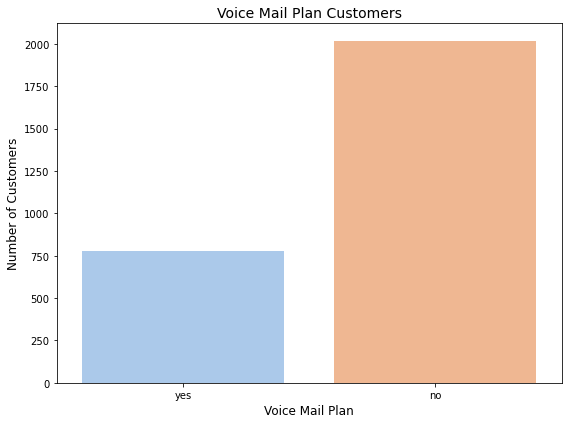

In [22]:
# Plot the distribution of customers with/without a voice mail plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='voice_mail_plan', palette='pastel')

# Set the title and axis labels
plt.title('Voice Mail Plan Customers', fontsize=14)
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### number of customers who have voice mail plan are less as compared to those who dont have 

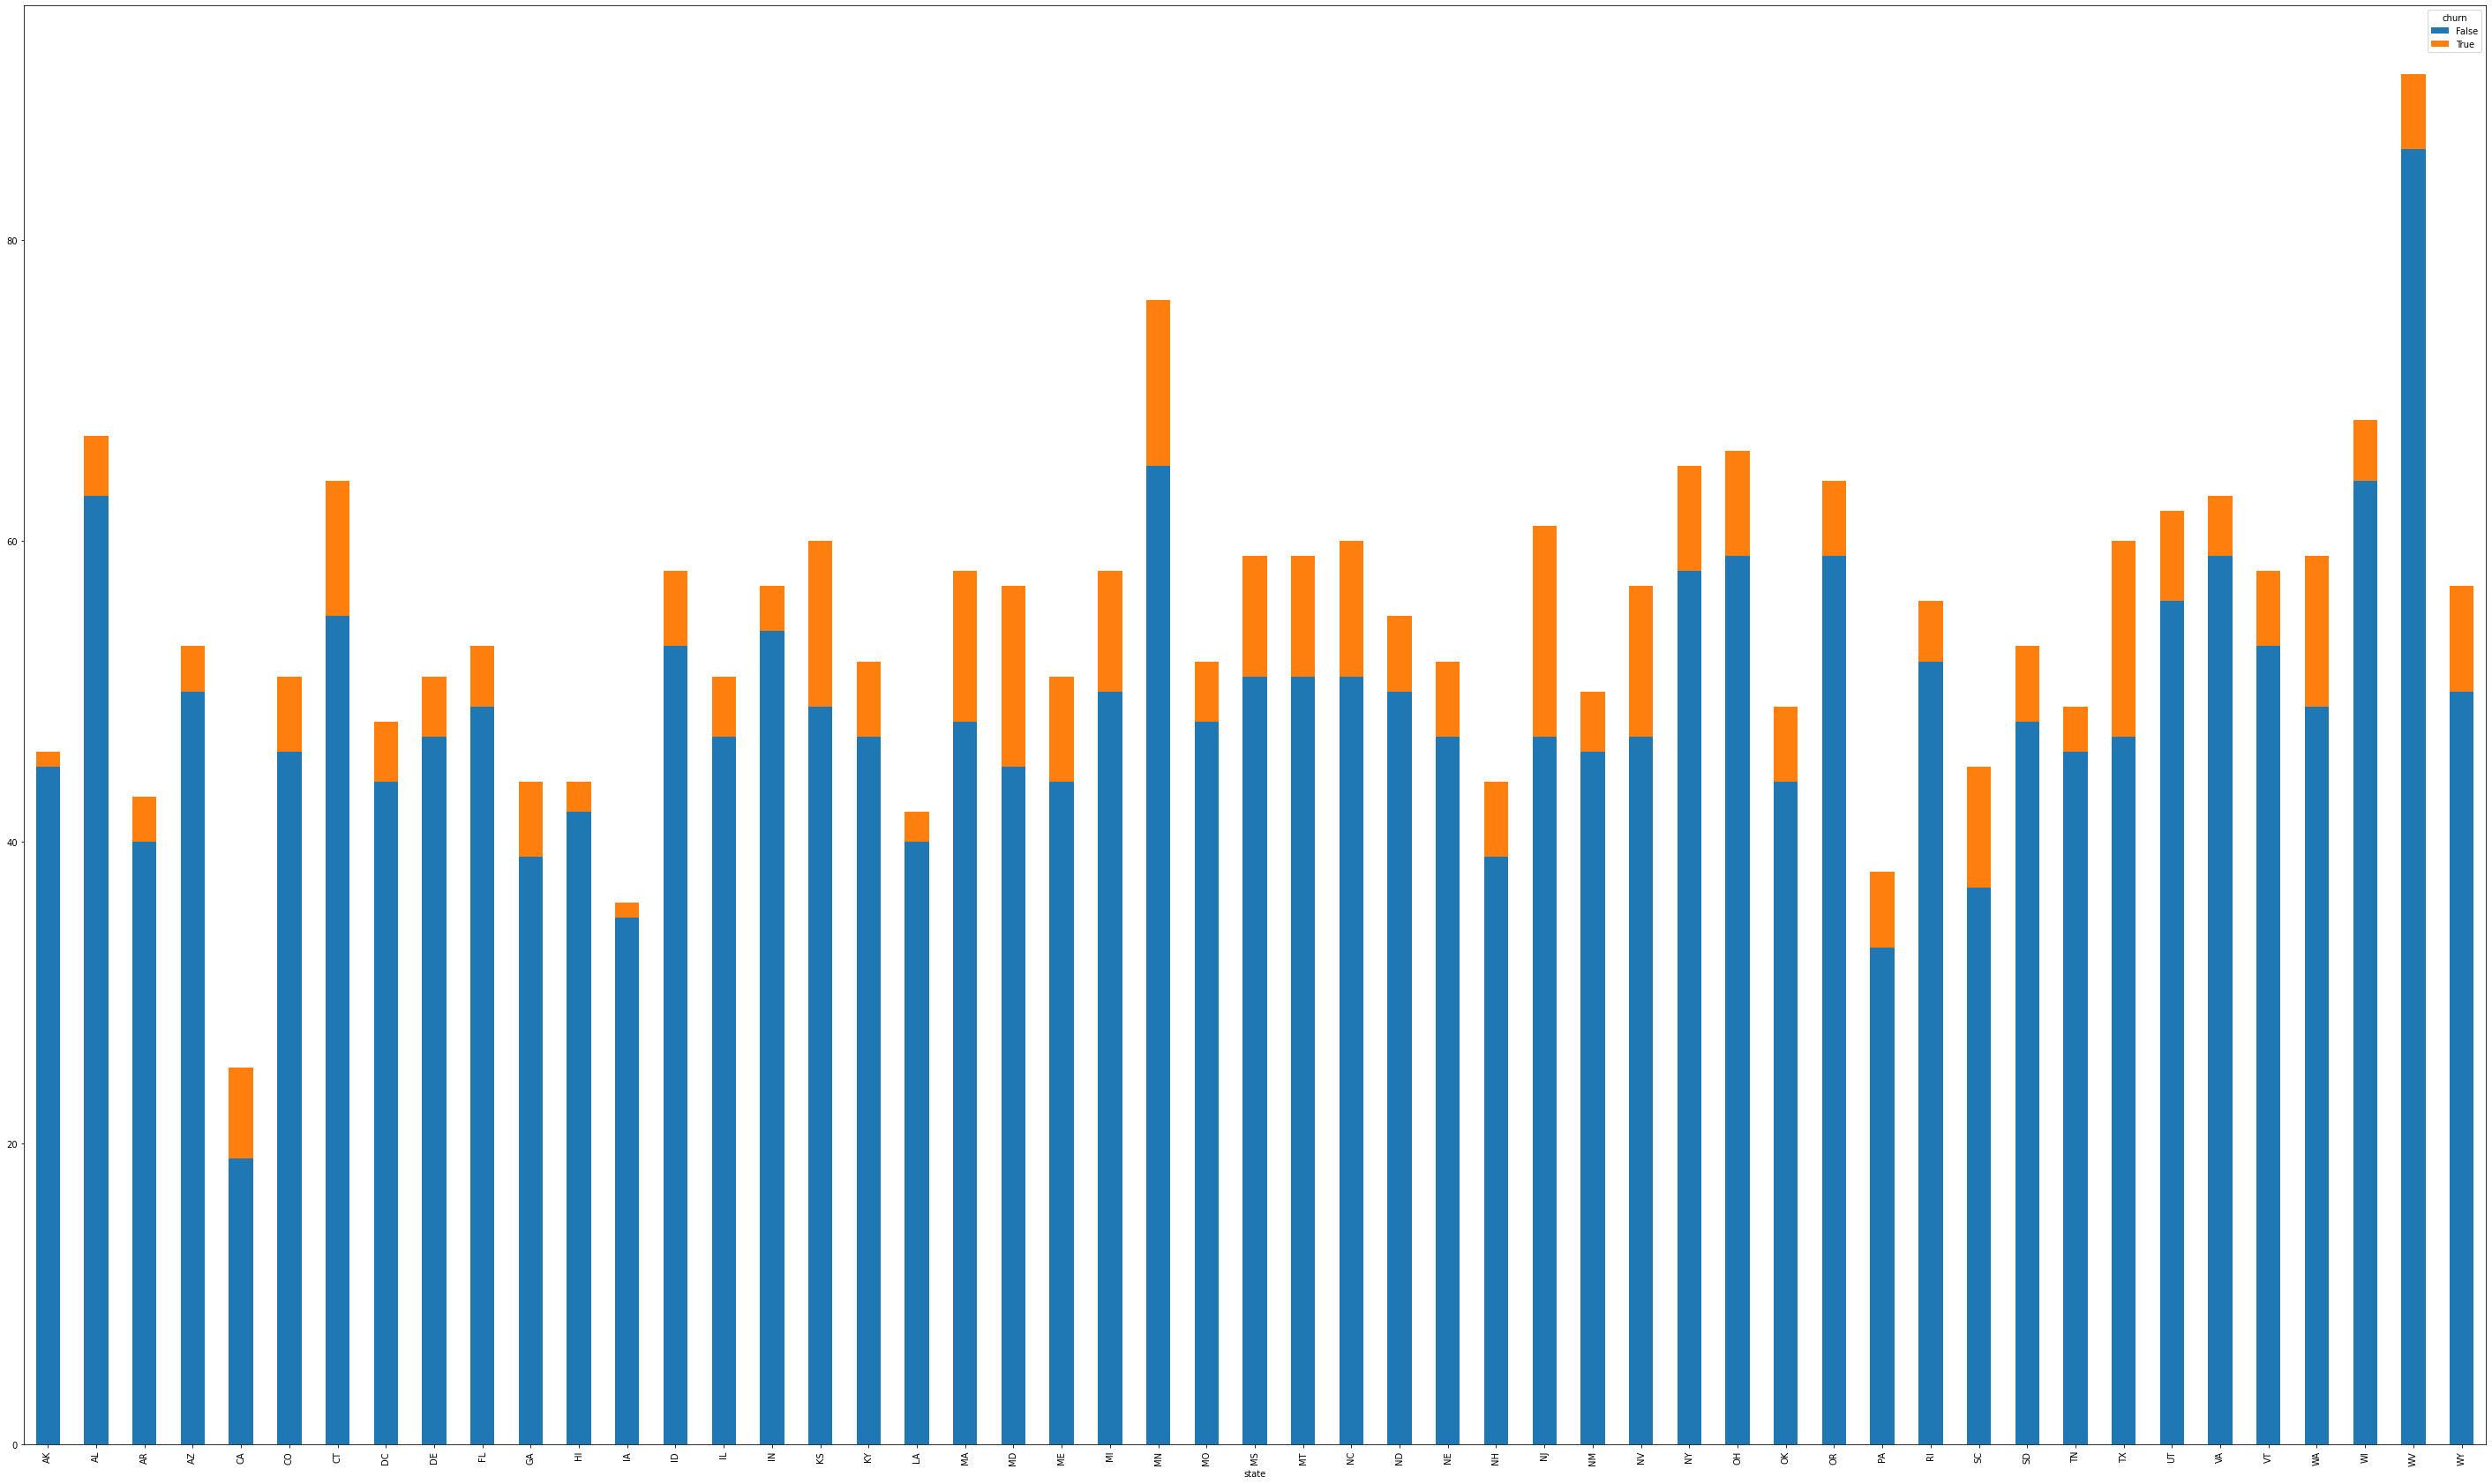

In [23]:
# Group the DataFrame 'df' by two columns: "state" and "churn"
grouped = data.groupby(["state", "churn"])

# Calculate the size (count) of each group and unstack the result
# Unstacking will pivot the data to make it suitable for a stacked bar plot
unstacked = grouped.size().unstack()

# Create a stacked bar plot using the unstacked data
unstacked.plot(kind='bar', stacked=True, figsize=(50, 30));

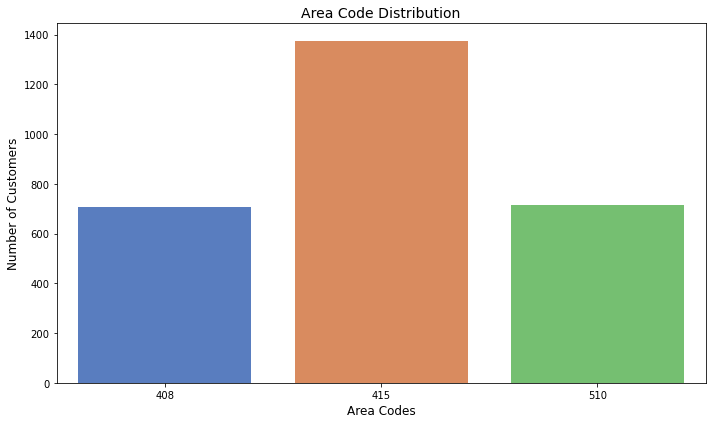

In [24]:
# Plot the distribution of customers by area code
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='area_code', palette='muted')

# Set the title and axis labels
plt.title('Area Code Distribution', fontsize=14)
plt.xlabel('Area Codes', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

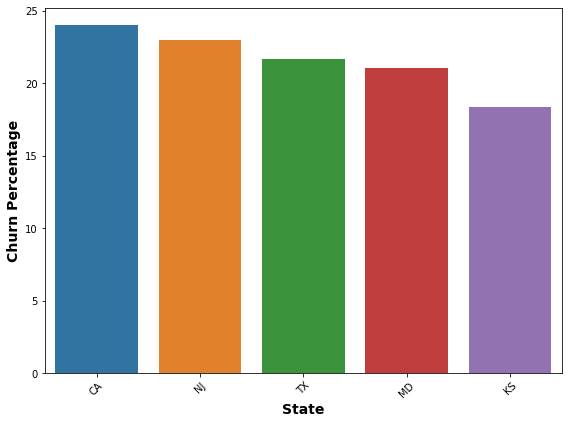

state
CA    24.000000
NJ    22.950820
TX    21.666667
MD    21.052632
KS    18.333333
Name: churn, dtype: float64

In [25]:
# Calculate churn percentage by state
state_churn_percentage = data.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 5 states
top_states = state_churn_percentage.sort_values(ascending=False).head(5)
top_states

# Plotting the top 5 states
plt.figure(figsize=(8, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Churn Percentage', fontsize=14, fontweight='bold')
#plt.title('Top 5 States with Highest Churn Percentage', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate churn percentage by state
state_churn_percentage = data.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 5 states
top_states = state_churn_percentage.sort_values(ascending=False).head(5)
top_states

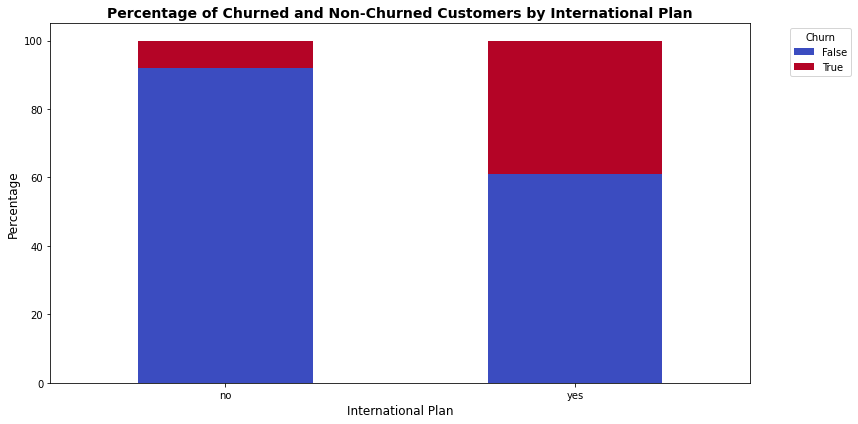

In [26]:
# Calculate the percentage of churned and non-churned customers by international plan
churn_counts = data.groupby(['international_plan', 'churn']).size().unstack()

# Calculate the percentage for each group
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plotting the data
plt.figure(figsize=(12, 6))
churn_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

# Customize the plot
plt.title('Percentage of Churned and Non-Churned Customers by International Plan', fontsize=14, fontweight='bold')
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



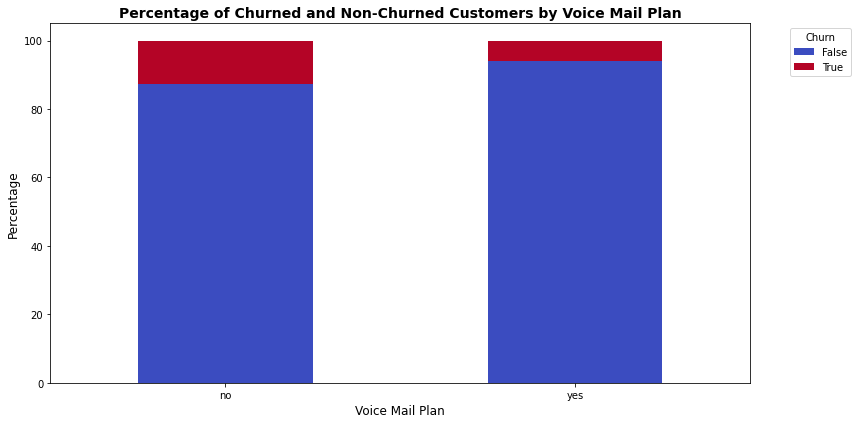

In [27]:

# Create a new DataFrame that calculates the percentage of churned and non-churned customers by voice mail plan
churn_counts = data.groupby(['voice_mail_plan', 'churn']).size().unstack().fillna(0)

# Calculate percentages for each group
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plotting the data as a bar plot
plt.figure(figsize=(12, 6))
churn_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

# Customizing the plot
plt.title('Percentage of Churned and Non-Churned Customers by Voice Mail Plan', fontsize=14, fontweight='bold')
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better visibility
plt.show()


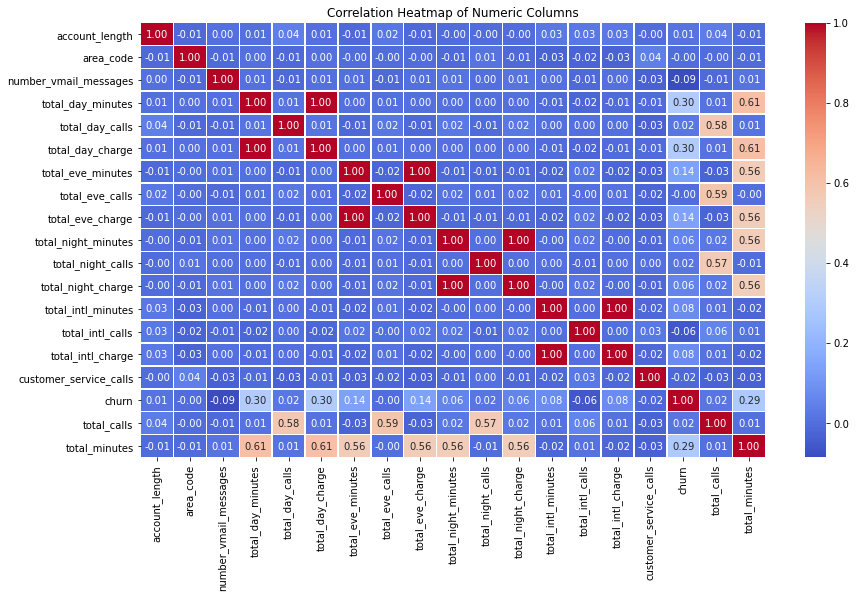

In [28]:
# Compute the correlation matrix
correlation_matrix =data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

# Data Pre-processing 

In [29]:
# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()
#Encoding the "churn" column
data['churn'] = label_encoder.fit_transform(data['churn'])

In [30]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['churn', 'state'], axis=1)
y = data['churn']
y.value_counts()

0    2493
1     304
Name: churn, dtype: int64

In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### define numeric and cateorical columns

In [32]:
# Identify numerical columns in the DataFrame by selecting columns with non-object data types
numerical_columns=X.select_dtypes(exclude='object').columns
# Identify categorical columns in the DataFrame by selecting columns with non-object data types
cat_columns=X.select_dtypes(include='object').columns

## Creating the Preprocessing Pipeline

In [33]:
# Define the numerical pipeline: handles scaling and missing values for numerical features
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('imputer',SimpleImputer(strategy='median'))
    ]
)
# Define the categorical pipeline: handles missing values and encoding for categorical features
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
        
    ]
)

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_columns),
        ('categorical_columns',cat_pipeline,cat_columns)
    ]
)

In [34]:
# Transform the training data using the preprocessor pipeline
X_train=preprocessor.fit_transform(X_train)
X_train

array([[-0.66182949, -0.51050434,  1.76694778, ...,  0.        ,
         0.        ,  1.        ],
       [-1.34232794,  1.75569644, -0.58766687, ...,  1.        ,
         1.        ,  0.        ],
       [-0.68703314,  1.75569644,  1.47262095, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.08214563,  1.75569644, -0.58766687, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.92600021,  1.75569644, -0.58766687, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86345866, -0.67748756, -0.58766687, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
# Transform the test data using the preprocessor pipeline
X_test=preprocessor.transform(X_test)
X_test

array([[-1.74558628, -0.67748756,  1.47262095, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.20324032, -0.51050434,  2.06127461, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.19509447, -0.67748756, -0.58766687, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.15283302, -0.67748756,  1.69336607, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.06907624, -0.51050434,  2.13485632, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.34631635,  1.75569644,  1.61978437, ...,  0.        ,
         0.        ,  1.        ]])

# Modelling  and Evaluation

###  logistic Regression

In [36]:
# Instantiate a logistic regression model with a specified solver
model=LogisticRegression(solver='liblinear')
# Fit the logistic regression model on the training data
model.fit(X_train,y_train)
# Predict the target variable for the test set
y_pred=model.predict(X_test)
# Predicting on the training data using the logistic regression model
model_train = model.predict(X_train)

# Predicting on the test data using the logistic regression model
model_test = model.predict(X_test)

###  model evaluation

In [37]:
#Accuracy
def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

#Precision
def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

#Recall
def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

#F1 score
def f1_score(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [38]:
print('LR Training Accuracy: ', accuracy(y_train, model_train))
print('LR Testing Accuracy: ', accuracy(y_test, model_test))
print()

print('LR Training Precision: ', precision(y_train, model_train))
print('LR Testing Precision: ', precision(y_test, model_test))
print()

print('LR Training Recall: ', recall(y_train, model_train))
print('LR Testing Recall: ', recall(y_test, model_test))
print()

print('LR Training F1-Score: ', f1_score(y_train, model_train))
print('LR Testing F1-Score: ', f1_score(y_test, model_test))

LR Training Accuracy:  0.9105945462673223
LR Testing Accuracy:  0.9071428571428571

LR Training Precision:  0.7087378640776699
LR Testing Precision:  0.6285714285714286

LR Training Recall:  0.3004115226337449
LR Testing Recall:  0.36065573770491804

LR Training F1-Score:  0.4219653179190752
LR Testing F1-Score:  0.45833333333333337


####  
The model demonstrates relatively low precision, recall, and F1-score on both the training and testing data. This indicates that the model has difficulty correctly identifying churned customers.

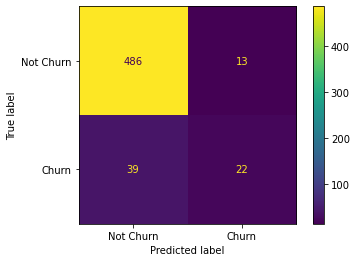

In [39]:
class_labels = ['Not Churn', 'Churn']
#plot_confusion_matrix(y_test, logreg_test, class_labels)
class_labels = ['Not Churn', 'Churn']
#plot_confusion_matrix(y_test, logreg_test, class_labels)
plot_confusion_matrix(model, X_test, y_test, display_labels=class_labels);

#### 
The model successfully identified 22 cases of customer churn (True Positives), but it mistakenly labeled 13 non-churn cases as churn (False Positives). Moreover, 39 actual churn cases were incorrectly classified as non-churn (False Negatives). These significant numbers of False Positives and False Negatives indicate that the model's performance might need improvement through further analysis and refinement.

### decision Tree

In [40]:
# Initialize a decision tree classifier with default parameters
dt = DecisionTreeClassifier()
#Train the classifier on the training dataset
dt.fit(X_train, y_train)
#predict using model
dt_train = dt.predict(X_train)
dt_test = dt.predict(X_test)

###  model evaluation

In [41]:
print('DT Training Accuracy: ', accuracy(y_train, dt_train))
print('DT Testing Accuracy: ', accuracy(y_test, dt_test))
print()

print('DT Training Precision: ', precision(y_train, dt_train))
print('DT Testing Precision: ', precision(y_test, dt_test))
print()

print('DT Training Recall: ', recall(y_train, dt_train))
print('DT Testing Recall: ', recall(y_test, dt_test))
print()

print('DT Training F1-Score: ', f1_score(y_train, dt_train))
print('DT Testing F1-Score: ', f1_score(y_test, dt_test))

DT Training Accuracy:  1.0
DT Testing Accuracy:  0.9303571428571429

DT Training Precision:  1.0
DT Testing Precision:  0.6666666666666666

DT Training Recall:  1.0
DT Testing Recall:  0.7213114754098361

DT Training F1-Score:  1.0
DT Testing F1-Score:  0.6929133858267716


###  
The decision tree model seems to be overfitting the training data, as evidenced by the perfect performance on the training set but lower performance on the testing set. The model achieves relatively lower precision, recall, and F1-score on the testing data, indicating that it may struggle to generalize well to unseen data.

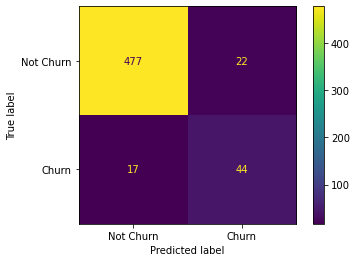

In [42]:
# Plotting the confusion matrix for the decision tree model 
class_labels = ['Not Churn', 'Churn']
plot_confusion_matrix(dt, X_test, y_test, display_labels=class_labels);

#### 
The model successfully identified 43 cases of customer churn (True Positives), but it mistakenly labeled 27 non-churn cases as churn (False Positives). Moreover, 18 actual churn cases were incorrectly classified as non-churn (False Negatives). This model appears to be more promising for a task as compared to logistic regresion model

### Random Forest

In [43]:
# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the test data
rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

 ### Random Forest model evaluation

In [44]:
print('RF Training Accuracy: ', accuracy(y_train, rf_train))
print('RF Testing Accuracy: ', accuracy(y_test, rf_test))
print()

print('RF Training Precision: ', precision(y_train, rf_train))
print('RF Testing Precision: ', precision(y_test, rf_test))
print()

print('RF Training Recall: ', recall(y_train, rf_train))
print('RF Testing Recall: ', recall(y_test, rf_test))
print()

print('RF Training F1-Score: ', f1_score(y_train, rf_train))
print('RF Testing F1-Score: ', f1_score(y_test, rf_test))

RF Training Accuracy:  0.9932945909700491
RF Testing Accuracy:  0.9660714285714286

RF Training Precision:  1.0
RF Testing Precision:  0.9772727272727273

RF Training Recall:  0.9382716049382716
RF Testing Recall:  0.7049180327868853

RF Training F1-Score:  0.9681528662420382
RF Testing F1-Score:  0.8190476190476191


### 
The Random Forest model exhibits strong performance on the testing set, with high accuracy, precision, recall, and F1-score.

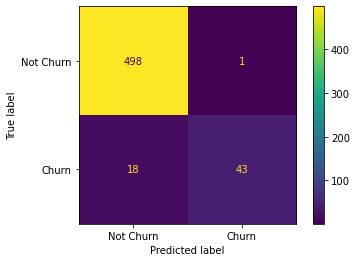

In [45]:
#ploting confusion matrix
class_labels = ['Not Churn', 'Churn']
plot_confusion_matrix(rf, X_test, y_test, display_labels=class_labels);

### 
The model has a good performance in correctly identifying non-churners, as indicated by a high number of true negatives (498) and a low number of false positives (1).However, the model struggles to accurately identify churners, as evident by a small number of true positives (43) and false negatives (18). This means there are some customers who are likely to churn but are being misclassified as non-churners.

### comparing the models
Out of the three models fitted above, the random forest model shows better performance across multiple evaluation metrics, making it a strong candidate for further hyperparameter tuning to potentially improve its performance even more.

### Plotting the ROC curve

In [46]:
# Create the dictionary of fitted models
fitted_models = {
    'Logistic Regression': model,
    'Decision Tree': dt,
    'Random Forest': rf
    }

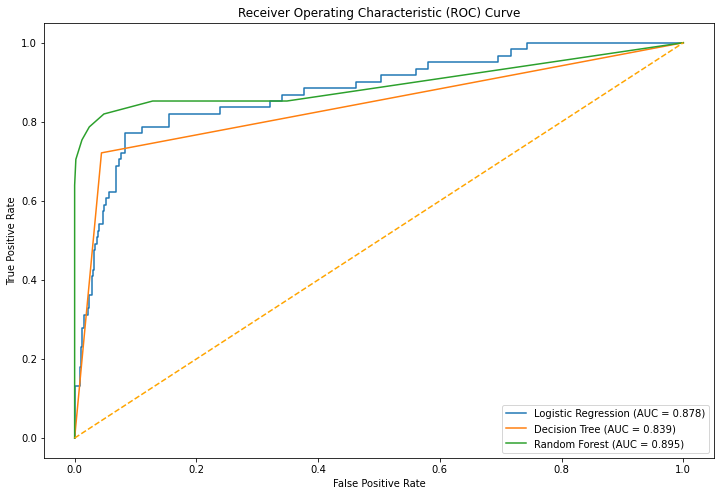

In [47]:
plt.figure(figsize=(12, 8))

# Iterate over fitted models
for model_name, model in fitted_models.items():
    # Predict probabilities for positive class
    y_probas = model.predict_proba(X_test)[:, 1]
    
    # Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    
    # Compute area under the curve
    auc = roc_auc_score(y_test, y_probas)
    
    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, label="{} (AUC = {:.3f})".format(model_name, auc))

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the plot title
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the plot
plt.show()

### 
Upon analyzing the ROC curves, we can make the following observations that is the random forest curve shows a significantly better performance compared to both Logistic Regression and Decision Tree. It exhibits a smooth curve that is very close to the top-left corner. The AUC value of 0.895 indicates that the model has an excellent overall predictive performance. It effectively distinguishes between churn and non-churn customers with a high degree of accuracy

### Hyperparameter tuning on the random forest model.

#### lets tune number of n_estimators

In [48]:
# Initialize an empty list to store the number of estimators and their corresponding ROC-AUC scores.
score = []
for e in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=e, random_state=1) 
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_test)[:,1]
    score.append((e, roc_auc_score(y_test,y_pred)))
# Create a pandas DataFrame from the 'score' list.
df_scores = pd.DataFrame(score, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.895430
1,20,0.895792
2,30,0.909705
3,40,0.911479
4,50,0.914074
5,60,0.918246
6,70,0.915996
7,80,0.915224
8,90,0.911134
9,100,0.915766


#### lets tune to maximum depth

In [49]:
# Initialize an empty list to store the max depth, number of estimators, and their corresponding ROC-AUC scores.
scores = []
#Iterate through a range of values for the number of estimators (from 10 to 200, incrementing by 10).
for d in [5, 6, 7, 10, 15]:
# Create a RandomForestClassifier instance with the current max depth (d) and number of estimators (e).
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=d)
        ## Train the RandomForestClassifier using the training dataset (X_train and y_train).
        rf.fit(X_train, y_train)
        # # Predict probabilities for the positive class (class 1) on the test dataset.
        y_pred = rf.predict_proba(X_test)[:,1]
         # Calculate the ROC-AUC score based on the true labels (y_test) and the predicted probabilities (y_pred).
        auc = roc_auc_score(y_test, y_pred)
        # Append a tuple containing the max depth (d), number of estimators (e), and the ROC-AUC score (auc) to the 'scores' list.
        scores.append((d, e, auc))
# Convert the 'scores' list into a pandas DataFrame with the specified column names:
df_scores = pd.DataFrame(scores, columns=['depth', 'n_estimators', 'auc'])
print(df_scores)

print(f'i have found that the maximum depth is 5')

    depth  n_estimators       auc
0       5            10  0.925063
1       5            20  0.927067
2       5            30  0.928743
3       5            40  0.924899
4       5            50  0.921384
..    ...           ...       ...
95     15           160  0.915700
96     15           170  0.914123
97     15           180  0.913729
98     15           190  0.912875
99     15           200  0.911709

[100 rows x 3 columns]
i have found that the maximum depth is 5


###  tuning to the maximum leaf

In [50]:
## performing hyperparameter tuning for a Random Forest Classifier to optimize its performance.
scores = []

for s in [1, 5, 10, 20, 50]:
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=5, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_pred)
        scores.append((s, e, auc))

df_scores = pd.DataFrame(scores, columns=['sample_leaf', 'n_estimators', 'auc'])
print(df_scores)

print(f'i have found that the minimum leaf is 1')

    sample_leaf  n_estimators       auc
0             1            10  0.925063
1             1            20  0.927067
2             1            30  0.928743
3             1            40  0.924899
4             1            50  0.921384
..          ...           ...       ...
95           50           160  0.897007
96           50           170  0.898354
97           50           180  0.898190
98           50           190  0.897566
99           50           200  0.896580

[100 rows x 3 columns]
i have found that the minimum leaf is 1


In [51]:
# Traininingthe random forest classifier
rf_tuned = RandomForestClassifier(
                             n_estimators=140,
                             random_state=1,
                             max_depth=5,
                             min_samples_leaf=1,
                             min_samples_split=2)
rf_tuned.fit(X_train, y_train)

# Make predictions on the test data
rf_tuned_train = rf_tuned.predict(X_train)
rf_tuned_test = rf_tuned.predict(X_test)

In [52]:
print('RF_tuned Training Accuracy: ', accuracy(y_train, rf_tuned))
print('RF_tuned Testing Accuracy: ', accuracy(y_test, rf_tuned_test))
print()

print('RF_tuned Training Precision: ', precision(y_train, rf_tuned_train))
print('RF_tuned Testing Precision: ', precision(y_test, rf_tuned_test))
print()

print('RF_tuned Training Recall: ', recall(y_train, rf_tuned_train))
print('RF_tuned Testing Recall: ', recall(y_test, rf_tuned_test))
print()

print('RF_tuned Training F1-Score: ', f1_score(y_train, rf_tuned_train))
print('RF_tuned Testing F1-Score: ', f1_score(y_test, rf_tuned_test))

RF_tuned Training Accuracy:  0.0
RF_tuned Testing Accuracy:  0.9517857142857142

RF_tuned Training Precision:  1.0
RF_tuned Testing Precision:  1.0

RF_tuned Training Recall:  0.6790123456790124
RF_tuned Testing Recall:  0.5573770491803278

RF_tuned Training F1-Score:  0.8088235294117647
RF_tuned Testing F1-Score:  0.7157894736842105


###  
The model shows improvements in recall, which is crucial in identifying and retaining customers at risk of churning. It suggests that the model may be more suitable for customer churn prediction, as it can identify a higher proportion of churned customers while still maintaining a reasonable level of precision

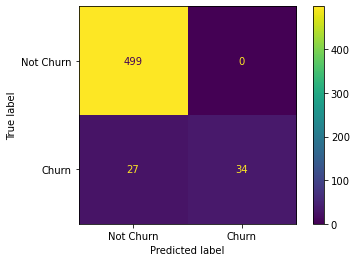

In [53]:
plot_confusion_matrix(rf_tuned, X_test, y_test, display_labels=class_labels) 